# Identifying disease risk
predicting the presence of a health condition based on patient data

## Scikit Learn (https://scikit-learn.org/dev/index.html)
Open-sourced Library for Machine Learning
- Pre-processing
- Machine Learning Models
- Evaluation Metrics


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Mock disease dataset

a mock dataset that contains patient data, such as age, bmi, blood pressure, etc.

The data is available at: https://github.com/MRCIEU/python_and_health_ds_training/tree/main/day-3/data

Save data to the following path:

`./data/mock_disease_data.csv`

In [2]:
# Load the dataset
df = pd.read_csv("./data/mock_disease_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             190 non-null    float64
 1   blood_pressure  190 non-null    float64
 2   cholesterol     190 non-null    float64
 3   bmi             190 non-null    float64
 4   target          190 non-null    float64
dtypes: float64(5)
memory usage: 7.9 KB


In [3]:
# Display the first few lines of the DataFrame
df.head()

,age,blood_pressure,cholesterol,bmi,target
0,58.0,NaN,199.0,25.0,0.0
1,48.0,136.0,203.0,25.0,1.0
2,34.0,158.0,238.0,NaN,1.0
3,62.0,132.0,182.0,24.0,0.0
4,27.0,133.0,216.0,27.0,0.0


## Exploratory Data Analysis (EDA)
EDA is a process used in data science to analyse datasets and summarize their main characteristics. 
- understand data patterns
- spot outliner/error
- identify relationships between variables
- prepare data for further analysis or modeling.

## Common Approach for EDA
- Descriptive Statistics
- Handling Missing Values
- Correlation Analysis: Measures how strongly two variables are related, often using a correlation matrix. This helps identify features with high correlation to the target variable or high correlation with each other.
- Outlier Detection
- Feature Engineering: Selecting features, scaling, etc.

In [4]:
# Display basic statistics
eda_summary = df.describe()
eda_summary

,age,blood_pressure,cholesterol,bmi,target
count,190.000000,190.000000,190.000000,190.000000,190.000000
mean,44.315789,130.157895,201.300000,26.300000,0.510526
std,14.415793,15.219255,29.754187,2.997265,0.501210
min,20.000000,81.000000,136.000000,18.000000,0.000000
25%,32.000000,119.000000,179.000000,24.000000,0.000000
50%,45.000000,131.000000,200.000000,26.000000,1.000000
75%,58.000000,139.000000,220.750000,28.000000,1.000000
max,69.000000,187.000000,292.000000,34.000000,1.000000


In [5]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

age               10
blood_pressure    10
cholesterol       10
bmi               10
target            10
dtype: int64

## Missing Value
- Remove
- Impute missing values

In [6]:
# Drop rows with any missing values
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 152 entries, 1 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             152 non-null    float64
 1   blood_pressure  152 non-null    float64
 2   cholesterol     152 non-null    float64
 3   bmi             152 non-null    float64
 4   target          152 non-null    float64
dtypes: float64(5)
memory usage: 7.1 KB


In [7]:
# Display the correlations to understand relationships
correlation_matrix = df.corr()
correlation_matrix

,age,blood_pressure,cholesterol,bmi,target
age,1.000000,0.054373,-0.006894,-0.103648,-0.016119
blood_pressure,0.054373,1.000000,-0.171205,-0.090136,0.608482
cholesterol,-0.006894,-0.171205,1.000000,0.037916,-0.202946
bmi,-0.103648,-0.090136,0.037916,1.000000,0.245953
target,-0.016119,0.608482,-0.202946,0.245953,1.000000


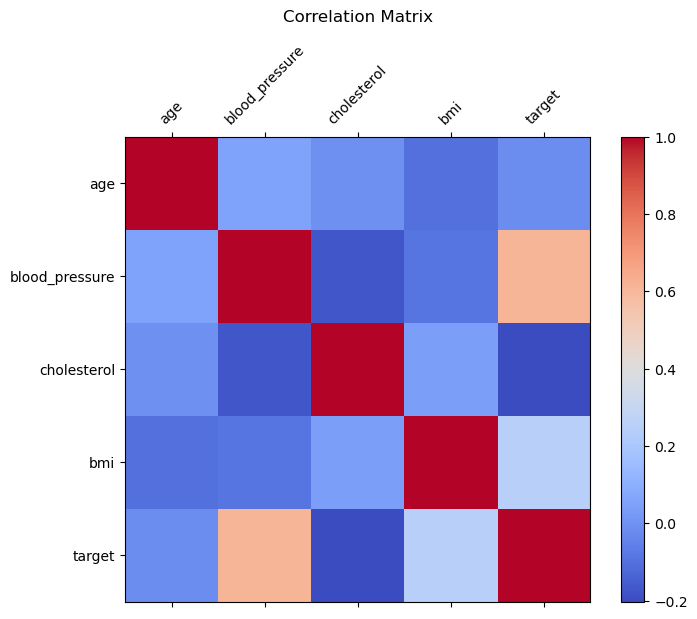

In [8]:
# Plotting Correlation Matrix using matplotlib
plt.figure(figsize=(8, 6))
plt.matshow(correlation_matrix, fignum=1, cmap="coolwarm")
plt.colorbar()
plt.title("Correlation Matrix", pad=15)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()

## Selecting Features
Selecting Features Based on Correlation with 'target'

Keep the features that have a correlation larger than 0.2

In [9]:
selected_features = correlation_matrix['target'].drop('target').abs().sort_values(ascending=False)
selected_features = selected_features[selected_features > 0.2]  # Threshold to select meaningful correlations
selected_feature_names = selected_features.index.tolist()
selected_feature_names

['blood_pressure', 'bmi', 'cholesterol']

## Split Training and test set
Splitting data into a training set and test set help build and evaluate a machine learning model.

- Evaluate Model Performance: The test set acts as new data, giving a realistic view of how the model might perform in real-world situations.
- Compare Different Models
- Prevent Overfitting

Scikit-Learn: 

```train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)```

https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.train_test_split.html


In [10]:
# Splitting the data into training and test sets
X = df[selected_feature_names]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Training Set Size:', len(X_train))
print('Test Set Size:', len(X_test))

Training Set Size: 121
Test Set Size: 31


## Data Scaling
Transforming data to a standard range or distribution

Common Types of Scaling:
- Standarlisation: https://scikit-learn.org/1.5/modules/generated/sklearn.preprocessing.StandardScaler.html#standardscaler
- Normalisation: https://scikit-learn.org/1.5/modules/generated/sklearn.preprocessing.normalize.html

Many algorithms are sensitive to the scale of the input features, such as
- Linear regression and logistic regression
- Support Vector Machines (SVMs)
- k-Nearest Neighbors (KNN)

In [11]:
# Standardising the features (important for linear models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
y_train

41     1.0
30     0.0
68     0.0
98     1.0
16     1.0
      ... 
93     0.0
138    1.0
19     0.0
120    1.0
134    0.0
Name: target, Length: 121, dtype: float64

In [14]:
# Applying Logistic Regression for Linear Classification
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [15]:
# Making predictions on the test set
y_pred = model.predict(X_test)
y_pred

array([1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0.])

In [17]:
y_test.tolist()

[1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0]

## Model Evaluation
Assessing the performance of a machine learning model to ensure that it performs well not only on training data but also on unseen test data.

### Classification Metrics
  
**Confusion Matrix**
|                     | Predicted Positive | Predicted Negative |
|---------------------|--------------------|--------------------|
| **Actual Positive** | True Positive (TP) | False Negative (FN) |
| **Actual Negative** | False Positive (FP) | True Negative (TN) |

- **Accuracy**: The ratio of correctly predicted samples to the total samples.
  
  Accuracy = (True Positives + True Negatives) / Total Samples

- **Precision**: Measures the accuracy of positive predictions. Useful when false positives are costly. (e.g. Medicine Prescriptions)

  Precision = True Positives / (True Positives + False Positives)

- **Recall (Sensitivity)**: Measures the ability of the model to find all positive samples. Useful when false negatives are costly. (e.g. Detecting Early-Stage of a Disease)

  Recall = True Positives / (True Positives + False Negatives)

- **F1 Score**: The harmonic mean of precision and recall, balancing the two.

  F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

### Regression Metrics
- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)
- R-square (R^2)

### Scikit-learn: 

```classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')```

https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.classification_report.html

In [18]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

Selected Features for Classification: ['blood_pressure', 'bmi', 'cholesterol']

Model Accuracy: 87.097%

Confusion Matrix:
 [[15  2]
 [ 2 12]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.88      0.88        17
         1.0       0.86      0.86      0.86        14

    accuracy                           0.87        31
   macro avg       0.87      0.87      0.87        31
weighted avg       0.87      0.87      0.87        31



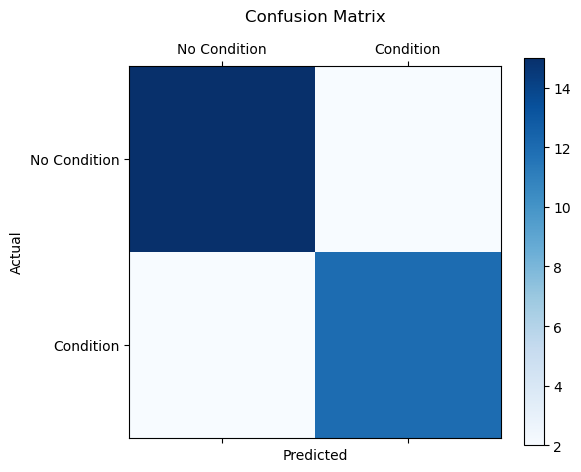

In [22]:
# Displaying Evaluation Metrics
print("Selected Features for Classification:", selected_feature_names)
print("\nModel Accuracy: {:.3f}%".format(accuracy*100))
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Plotting Confusion Matrix
plt.figure(figsize=(6, 5))
plt.matshow(conf_matrix, fignum=1, cmap="Blues")
plt.colorbar()
plt.title("Confusion Matrix", pad=15)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks([0, 1], ["No Condition", "Condition"])
plt.yticks([0, 1], ["No Condition", "Condition"])
plt.show()